In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math

from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [23]:
print('Seaborn version: ',sns.__version__)
print('Statsmodel version: ',statsmodels.__version__)

Seaborn version:  0.8.0
Statsmodel version:  0.9.0


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


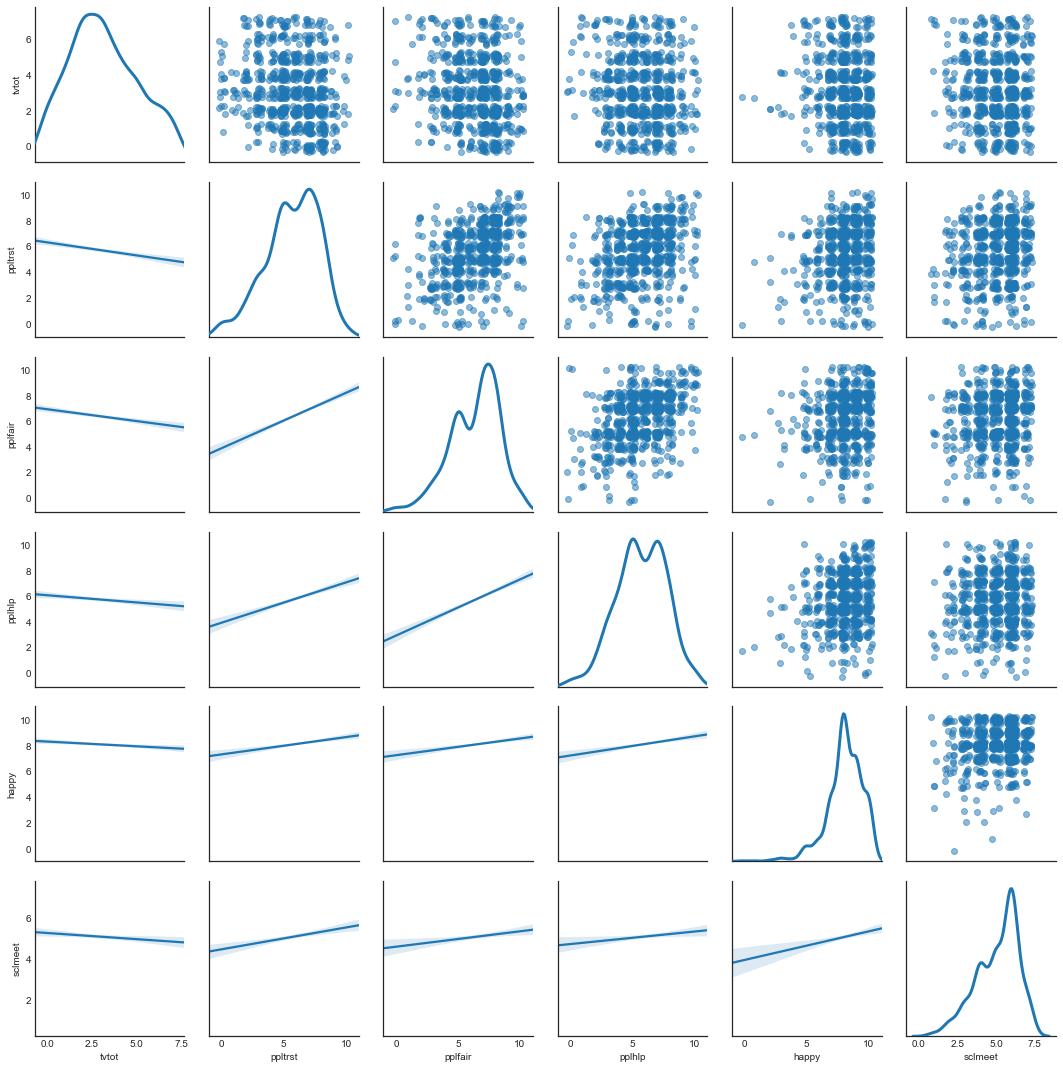

In [24]:
# Make the scatterplot matrix
# Set the default plot aesthetics to be prettier.
sns.set_style("white")

#df = pd.read_csv('data/ESSdata_Thinkful.csv')
df = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv')

# Take a subset of the data to make plots clearer.
df_czch = df.loc[
    ((df['cntry'] == 'CZ') | (df['cntry'] == 'CH')) & (df['year'] == 6),
    ['cntry', 'tvtot', 'ppltrst', 'pplfair', 'pplhlp', 'happy', 'sclmeet']
]

# Because the variables can only take integer values between 0 and 10, points
# on the scatterplot will hide one another. To better see all the points, we
# create a dataframe of random noise (or "jitter") and add it only when plotting.

# Make a copy of the data to add jitter to and plot.
df_jittered = df_czch.loc[:, 'tvtot':'sclmeet'].dropna()

# Making the random noise.
jitter = pd.DataFrame(
    np.random.uniform(-.3, .3, size=(df_jittered.shape)),
    columns=df_jittered.columns
)
# Combine the data and the noise.
df_jittered = df_jittered.add(jitter)

# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(df_jittered.dropna(), diag_sharey=False)

# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)

# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))

# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)

plt.show()

#Some warnings will show up below because the plot does not include a legend.

            tvtot   ppltrst   pplfair    pplhlp     happy   sclmeet
tvtot    1.000000 -0.240432 -0.233280 -0.176517 -0.265293 -0.144105
ppltrst -0.240432  1.000000  0.605589  0.500378  0.297432  0.148949
pplfair -0.233280  0.605589  1.000000  0.532927  0.275204  0.105886
pplhlp  -0.176517  0.500378  0.532927  1.000000  0.269627  0.109383
happy   -0.265293  0.297432  0.275204  0.269627  1.000000  0.244289
sclmeet -0.144105  0.148949  0.105886  0.109383  0.244289  1.000000


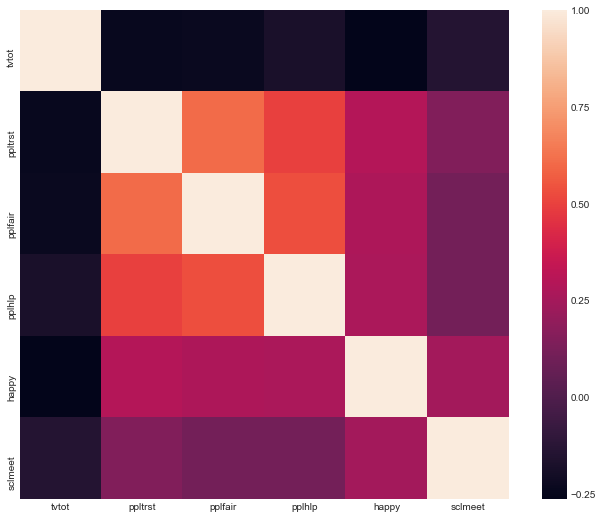

In [25]:
#Make a corelation matrix
corrmat = df_czch.corr()
print(corrmat)
#Set up matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

#Heatmap
sns.heatmap(corrmat, vmax = 1, square = True)
plt.show()


C:\Users\peter\Anaconda3\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


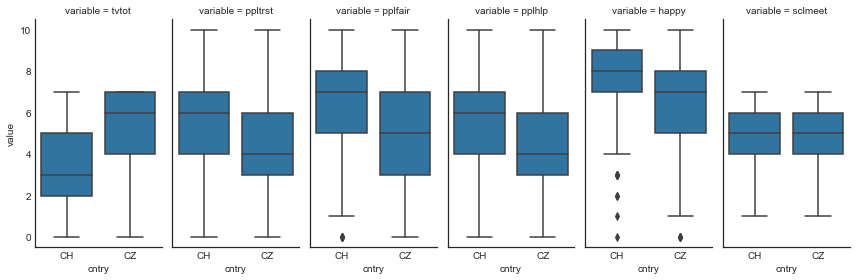

In [26]:
#Boxplots for each country

#Restructure to use FacetGrid
df_long = df_czch
df_long = pd.melt(df_long, id_vars =['cntry'])

g = sns.FacetGrid(df_long, col = "variable", size = 4, aspect = 0.5)
g = g.map(sns.boxplot,"cntry", "value")
plt.show()

In [27]:
#Descriptive statistics by group
print(df_czch.groupby('cntry').describe())

       tvtot                                              ppltrst            \
       count      mean       std  min  25%  50%  75%  max   count      mean   
cntry                                                                         
CH     772.0  3.141192  1.913706  0.0  2.0  3.0  5.0  7.0   773.0  5.677878   
CZ     653.0  5.142420  1.851775  0.0  4.0  6.0  7.0  7.0   651.0  4.362519   

       ... happy       sclmeet                                               
       ...   75%   max   count      mean       std  min  25%  50%  75%  max  
cntry  ...                                                                   
CH     ...   9.0  10.0   770.0  5.080519  1.339122  1.0  4.0  5.0  6.0  7.0  
CZ     ...   8.0  10.0   655.0  4.648855  1.667845  1.0  4.0  5.0  6.0  7.0  

[2 rows x 48 columns]


In [28]:
#Test whether group differences are significant
for col in df_czch.loc[:,'tvtot':'sclmeet'].columns:
    print(col)
    print(stats.ttest_ind(
        df_czch[df_czch['cntry'] == 'CZ'][col].dropna(),
        df_czch[df_czch['cntry'] == 'CH'][col].dropna()
    ))

tvtot
Ttest_indResult(statistic=19.962218108197227, pvalue=2.321576398582079e-78)
ppltrst
Ttest_indResult(statistic=-10.928900558029875, pvalue=9.394029017549828e-27)
pplfair
Ttest_indResult(statistic=-12.444422221030575, pvalue=8.170685823736718e-34)
pplhlp
Ttest_indResult(statistic=-10.762634615325524, pvalue=5.029799135071355e-26)
happy
Ttest_indResult(statistic=-14.142750296144351, pvalue=1.4274009995900834e-42)
sclmeet
Ttest_indResult(statistic=-5.41690921114413, pvalue=7.11086821821287e-08)


<p>Judging by the boxplots, the 'happy' variable has some potential outliers for Switzerland that we should keep an eye on. The two countries appear to differ significantly for all the variables measured.</p>

C:\Users\peter\Anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


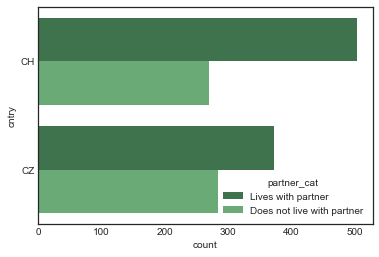

partner_cat  Does not live with partner  Lives with partner
cntry                                                      
CH                                  270                 503
CZ                                  284                 372
Power_divergenceResult(statistic=96.39958012596222, pvalue=9.236593586645439e-21)


In [29]:
# Add a second categorical variable.
df_2cat = df.loc[
    ((df['cntry'] == 'CZ') | (df['cntry'] == 'CH')) & (df['year'] == 6),
    ['cntry','partner']
]

# Create a text variable so that output is easier to interpret.
df_2cat['partner_cat'] = None
df_2cat.loc[df_2cat['partner'] == 1, 'partner_cat'] = 'Lives with partner'
df_2cat.loc[df_2cat['partner'] == 2, 'partner_cat'] = 'Does not live with partner'

# Plot counts for each combination of levels.
sns.countplot(y="cntry", hue="partner_cat", data=df_2cat, palette="Greens_d")
plt.show()

# Table of counts
counttable = pd.crosstab(df_2cat['cntry'], df_2cat['partner_cat'])
print(counttable)

# Test will return a chi-square test statistic and a p-value. Like the t-test,
# the chi-square is compared against a distribution (the chi-square
# distribution) to determine whether the group size differences are large
# enough to reflect differences in the population.
print(stats.chisquare(counttable, axis=None))

# Feature Engineering

Categorical Variables:
For X number of variables, we create X-1 number of numeric variables that can be assigned either 0 or 1. Here, we create country variables.

In [30]:
#Make dummies
#Create dataframe to hold our features.
features = pd.get_dummies(df['cntry'])

features['Nordic'] = np.where((df['cntry'].isin(['NO','SE'])), 1, 0)

print(pd.crosstab(features['Nordic'], df['cntry']))

cntry     CH    CZ  DE    ES    NO    SE
Nordic                                  
0       1546  1316  28  2426     0     0
1          0     0   0     0  1462  1816


# Changing variable type

We will be taking a continuous variable, in this case: age, and make it a categorical one.
We are interested in adults over the age of 65.

In [31]:
features['Adult_65plus'] = np.where(df['agea'] >= 65, 1, 0)

#Check and see if it works properly
print(df['agea'].groupby(features['Adult_65plus']).describe())

               count       mean        std   min   25%   50%   75%    max
Adult_65plus                                                             
0             6682.0  40.874738  13.958596  15.0  29.0  42.0  53.0   64.0
1             1673.0  73.815302   6.650086  65.0  69.0  72.0  78.0  114.0


# Combining Correlated Variables

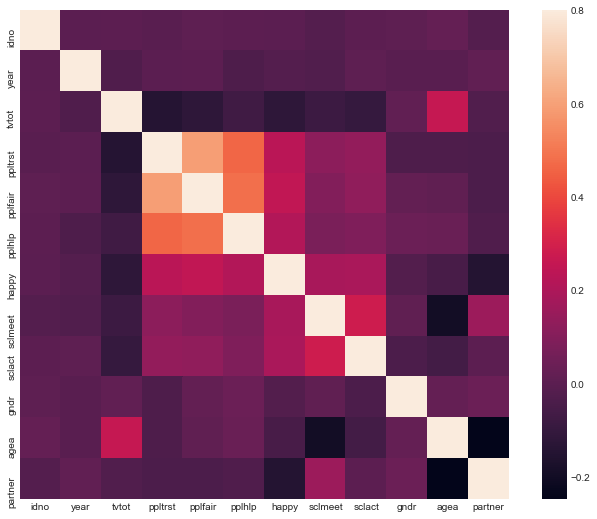

In [32]:
corrmat = df.corr()

f, ax = plt.subplots(figsize = (12,9))

sns.heatmap(corrmat, vmax = 0.8, square = True)
plt.show()

In [33]:
#ppltrst, pplfair, pplhlp are strongly correlated. We can combine these variables into one feature by taking the average.
means = df[['ppltrst','pplfair', 'pplhlp']].mean(axis = 0)
stds = df[['ppltrst','pplfair', 'pplhlp']].std(axis = 0)
features['trust_fair_help'] = ((df[['ppltrst','pplfair', 'pplhlp']] - means) / stds).mean(axis = 1)

#Check how well the mean correlates with the three variables
plotdf = df.loc[:,['ppltrst','pplfair', 'pplhlp']]
plotdf['trust_fair_help'] = features['trust_fair_help']
corrmat2 = plotdf.corr()

print(corrmat2)

                  ppltrst   pplfair    pplhlp  trust_fair_help
ppltrst          1.000000  0.592001  0.462562         0.834209
pplfair          0.592001  1.000000  0.480918         0.841674
pplhlp           0.462562  0.480918  1.000000         0.789318
trust_fair_help  0.834209  0.841674  0.789318         1.000000


# Turning non-normal data into normal data

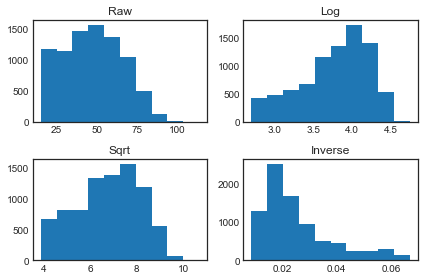

In [34]:
#age
fig = plt.figure()

fig.add_subplot(221)
plt.hist(df['agea'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df['agea'].dropna()))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df['agea'].dropna()))
plt.title('Sqrt')

fig.add_subplot(224)
plt.hist(1/df['agea'].dropna())
plt.title('Inverse')

plt.tight_layout()
plt.show()

#None of these look quite normally distributed, lets add 'log' to our features.
features['log_age'] = np.log(df['agea'])

# Creating linear relationships

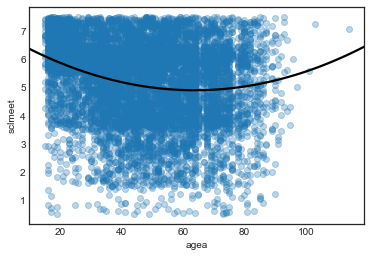

In [35]:
sns.regplot(
    df['agea'],
    y = df['sclmeet'],
    y_jitter = 0.49,
    order = 2,
    scatter_kws = {'alpha':0.3},
    line_kws = {'color':'black'},
    ci = None
)

plt.show()

features['age_squared'] =  df['agea'] * df['agea']

Suppose we want to explore the correlation between sadness and tv watching habbits.

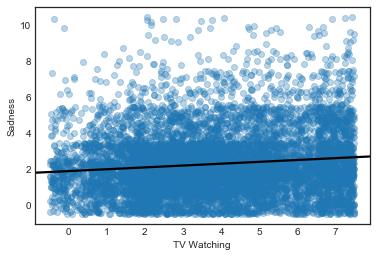

In [36]:
features['Sadness'] = max(df['happy']) - df['happy']

sns.regplot(
    df['tvtot'],
    features['Sadness'],
    x_jitter = 0.49,
    y_jitter = 0.49,
    scatter_kws={'alpha':0.3},
    line_kws = {'color':'black'},
    ci = None
)

plt.xlabel('TV Watching')
plt.ylabel('Sadness')
plt.show()

#Leveling the playing field: Normalizing ranges

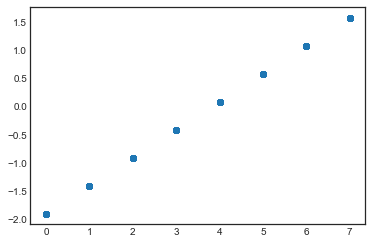

               idno          year         tvtot       ppltrst       pplfair  \
count  8.147000e+03  8.147000e+03  8.147000e+03  8.147000e+03  8.147000e+03   
mean  -4.888824e-19 -2.645920e-15 -7.836428e-16 -7.257574e-15 -6.105886e-16   
std    1.000061e+00  1.000061e+00  1.000061e+00  1.000061e+00  1.000061e+00   
min   -6.364414e-02 -1.000614e+00 -1.900914e+00 -2.516209e+00 -2.832624e+00   
25%   -6.196385e-02 -1.000614e+00 -9.053021e-01 -7.108364e-01 -4.741304e-01   
50%   -6.087847e-02  9.993865e-01  9.031023e-02  1.918499e-01 -2.431735e-03   
75%   -5.925039e-02  9.993865e-01  5.881164e-01  6.431931e-01  9.409657e-01   
max    1.734276e+01  9.993865e-01  1.583729e+00  1.997223e+00  1.884363e+00   

             pplhlp         happy       sclmeet        sclact          gndr  \
count  8.147000e+03  8.147000e+03  8.147000e+03  8.147000e+03  8.147000e+03   
mean  -8.793070e-17  2.377904e-15 -1.101365e-15 -2.058798e-15 -3.414477e-15   
std    1.000061e+00  1.000061e+00  1.000061e+00  1.

In [37]:
from sklearn import preprocessing

#Look at onlt numeric variables from dataset
df_num = df.select_dtypes(include=[np.number]).dropna()

names = df_num.columns

df_scaled = pd.DataFrame(preprocessing.scale(df_num), columns = names)

plt.scatter(df_num['tvtot'], df_scaled['tvtot'])
plt.show()

print(df_scaled.describe())

# Interactions

Suppose that TV only makes people sad if they live alone, we will need to explore this by multiplying the feature sadness with the feature LiveWithPartner and plot the effets relative to the total tv time.

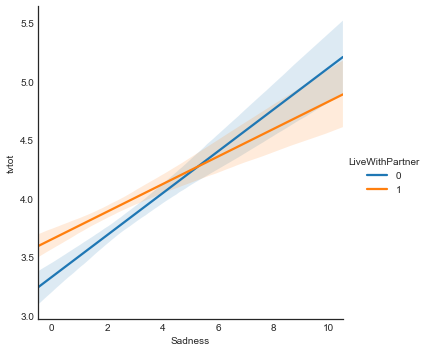

In [40]:
features['LiveWithPartner'] = np.where(df['partner']==1, 1, 0)
features['Sad_Partner'] = features['Sadness'] * features['LiveWithPartner']

features['tvtot'] = df['tvtot']

sns.lmplot(
    x = 'Sadness',
    y = 'tvtot',
    hue = 'LiveWithPartner',
    data = features,
    scatter = False
)
plt.show()

# PCA rotation in space

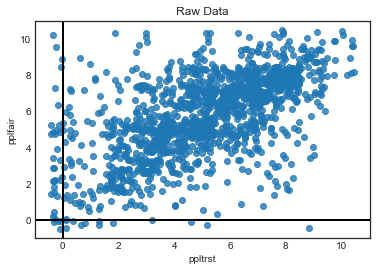

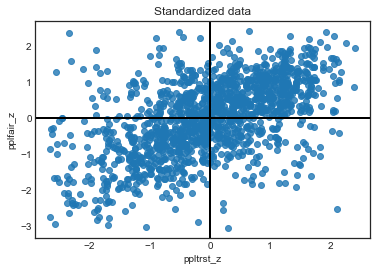

In [43]:
df_pca = df.loc[
    ((df['cntry'] == 'CZ') | (df['cntry'] == 'CH')) & (df['year'] == 6),
    ['tvtot','ppltrst','pplfair','pplhlp']
].dropna()

t = sns.regplot(
    'ppltrst',
    'pplfair',
    df_pca,
    x_jitter = 0.49,
    y_jitter = 0.49,
    fit_reg = False
)

t.set(xlim = (-1, 11), ylim = (-1, 11))
t.axhline(0, color = 'k', linestyle = '-', linewidth = 2)
t.axvline(0, color = 'k', linestyle = '-', linewidth = 2)
t.axes.set_title('Raw Data')
plt.show()


#Here we standardize every point
df_pca['ppltrst_z'] = (df_pca['ppltrst'] - df_pca['ppltrst'].mean()) / df_pca['ppltrst'].std()
df_pca['pplfair_z'] = (df_pca['pplfair'] - df_pca['pplfair'].mean()) / df_pca['pplfair'].std()

t = sns.regplot(
    'ppltrst_z',
    'pplfair_z',
    df_pca,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Standardized data')
plt.show()

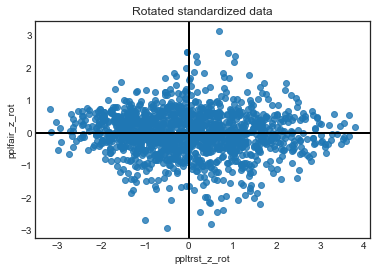

In [46]:
# Rotating the data so that the axes roughly match to vector above.
df_pca['ppltrst_z_rot'] = math.cos(40) * df_pca['ppltrst_z'] - math.sin(40) * df_pca['pplfair_z']
df_pca['pplfair_z_rot'] = math.sin(40) * df_pca['ppltrst_z'] + math.cos(40) * df_pca['pplfair_z']

t = sns.regplot(
    'ppltrst_z_rot',
    'pplfair_z_rot',
    df_pca,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Rotated standardized data')
plt.show()